In [1]:
import numpy as np
import sympy as sy
import scipy as sp
import matplotlib.pyplot as plt
sy.init_printing()

In [2]:
from sympy.core.symbol import symbols
from sympy import Matrix

In [8]:
sigma, r , epsilon, V, f= sy.symbols('sigma r epsilon V f')
x1, x2, y1, y2, z1, z2 = sy.symbols('x1 x2 y1 y2 z1 z2')
xi, xj, t, dt, a = sy.symbols('x_i x_j t delta ')

# ex, ey, ez = symbols('epsilon_x epsilon_y epsilon_z')
# rxy, ryz, rzx = symbols('gamma_xy gamma_yz gamma_zx')
# sigx, sigy, sigz = symbols('sigma_x sigma_y sigma_z')
# tauxy, tauyz, tauzx = symbols('tau_xy tau_yz tau_zx')
# C11, C12, C13 = symbols('C11, C12, C13')
# C21, C22, C23 = symbols('C21, C22, C23')
# C31, C32, C33 = symbols('C31, C32, C33')
# C44, C55, C66 = symbols('C44, C55, C66')
# nu, E = symbols('nu E')

ValueError: need more than 4 values to unpack

In [9]:
for i in range(6):
    for j in range(6):
        print("C"+str(i+1)+str(j+1)+" ",end="")

C11 C12 C13 C14 C15 C16 C21 C22 C23 C24 C25 C26 C31 C32 C33 C34 C35 C36 C41 C42 C43 C44 C45 C46 C51 C52 C53 C54 C55 C56 C61 C62 C63 C64 C65 C66 

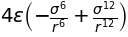

In [10]:
V=4*epsilon( (sigma/r)**12 - (sigma/r)**6 )
V

In [11]:
dV_dr=sy.diff(V,r)
F=-dV_dr
F

   ⎛   6       12⎞                           
   ⎜6⋅σ    12⋅σ  ⎟ ⎛ d        ⎞│      6    12
-4⋅⎜──── - ──────⎟⋅⎜───(ε(ξ₁))⎟│     σ    σ  
   ⎜  7      13  ⎟ ⎝dξ₁       ⎠│ξ₁=- ── + ───
   ⎝ r      r    ⎠                    6    12
                                     r    r  

In [12]:
F.subs({sigma/r:f})

   ⎛      12      6⎞                         
   ⎜  12⋅f     6⋅f ⎟ ⎛ d        ⎞│           
-4⋅⎜- ────── + ────⎟⋅⎜───(ε(ξ₁))⎟│    12    6
   ⎝    r       r  ⎠ ⎝dξ₁       ⎠│ξ₁=f   - f 

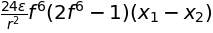

In [13]:
Fxij = 24*epsilon*f**6*(2*f**6 - 1)/r*(x1-x2)/r
sy.simplify(Fxij)

In [14]:
ls=list(sy.simplify(sy.solve(dV_dr,sigma)))
ls[0:3]

$r=\sqrt{\left(- x_{1} + x_{2}\right)^{2} + \left(- y_{1} + y_{2}\right)^{2} + \left(- z_{1} + z_{2}\right)^{2}}$

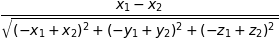

In [15]:
sy.diff(sy.sqrt((x2-x1)**2 +(y2-y1)**2 +(z2-z1)**2 ),x1)

In [16]:
print(sy.diff(sy.sqrt((x2-x1)**2 +(y2-y1)**2 +(z2-z1)**2 ),x1))

(x1 - x2)/sqrt((-x1 + x2)**2 + (-y1 + y2)**2 + (-z1 + z2)**2)


In [17]:
xj = 2*xi - xi*(t-dt) + a*dt**2

NameError: name 'xi' is not defined

$x_j= 2 x_i - x_i(t - dt) + a dt^2$

In [71]:
SigmaVector = np.matrix([sigx, sigy, sigz, tauxy, tauyz, tauzx])

In [72]:
EpsilonVector = np.matrix([ex, ey, ez, rxy, ryz, rzx])

In [73]:
reci = 1/( (1+nu)*(1-2*nu) )
DVector = np.multiply(np.matrix([
    [C11*(1-nu), C12*nu, C13*nu, 0, 0, 0],
    [C21*nu, C22*(1-nu), C23*nu, 0, 0, 0],
    [C31*nu, C32*nu, C33*(1-nu), 0, 0, 0],
    [0, 0, 0, C44*(1-2*nu)/2, 0, 0],
    [0, 0, 0, 0, C55*(1-2*nu)/2, 0],
    [0, 0, 0, 0, 0, C66*(1-2*nu)/2]
]),reci)
EVector = np.multiply(np.matrix([
    [E*(1-nu), E*nu, E*nu, 0, 0, 0],
    [E*nu, E*(1-nu), E*nu, 0, 0, 0],
    [E*nu, E*nu, E*(1-nu), 0, 0, 0],
    [0, 0, 0, E*(1-2*nu)/2, 0, 0],
    [0, 0, 0, 0, E*(1-2*nu)/2, 0],
    [0, 0, 0, 0, 0, E*(1-2*nu)/2]
]),reci)

In [74]:
strs=DVector*(np.transpose(EpsilonVector))
strsE=EVector*(np.transpose(EpsilonVector))

In [83]:
ESolveMatrix = sy.Matrix(np.zeros(6))

In [87]:
for i in range(6):
    ESolveMatrix[i] = sy.solve(Matrix(strsE)[i]-Matrix(SigmaVector)[i],E)

In [89]:
ESolveMatrix

⎡      ⎛     2        ⎞    ⎤
⎢   σₓ⋅⎝- 2⋅ν  - ν + 1⎠    ⎥
⎢──────────────────────────⎥
⎢-εₓ⋅ν + εₓ + ε_y⋅ν + ε_z⋅ν⎥
⎢                          ⎥
⎢       ⎛     2        ⎞   ⎥
⎢   σ_y⋅⎝- 2⋅ν  - ν + 1⎠   ⎥
⎢──────────────────────────⎥
⎢εₓ⋅ν - ε_y⋅ν + ε_y + ε_z⋅ν⎥
⎢                          ⎥
⎢       ⎛     2        ⎞   ⎥
⎢   σ_z⋅⎝- 2⋅ν  - ν + 1⎠   ⎥
⎢──────────────────────────⎥
⎢εₓ⋅ν + ε_y⋅ν - ε_z⋅ν + ε_z⎥
⎢                          ⎥
⎢      2⋅τ_xy⋅(ν + 1)      ⎥
⎢      ──────────────      ⎥
⎢           γ_xy           ⎥
⎢                          ⎥
⎢      2⋅τ_yz⋅(ν + 1)      ⎥
⎢      ──────────────      ⎥
⎢           γ_yz           ⎥
⎢                          ⎥
⎢      2⋅τ_zx⋅(ν + 1)      ⎥
⎢      ──────────────      ⎥
⎣           γ_zx           ⎦

In [96]:
g = sy.lambdify((E), ESolveMatrix)

In [100]:
print(ESolveMatrix)

Matrix([[sigma_x*(-2*nu**2 - nu + 1)/(-epsilon_x*nu + epsilon_x + epsilon_y*nu + epsilon_z*nu)], [sigma_y*(-2*nu**2 - nu + 1)/(epsilon_x*nu - epsilon_y*nu + epsilon_y + epsilon_z*nu)], [sigma_z*(-2*nu**2 - nu + 1)/(epsilon_x*nu + epsilon_y*nu - epsilon_z*nu + epsilon_z)], [2*tau_xy*(nu + 1)/gamma_xy], [2*tau_yz*(nu + 1)/gamma_yz], [2*tau_zx*(nu + 1)/gamma_zx]])
